### Data Science vs. Business Intelligence / Data Analytics 

* Data analytics/BI focuses on understanding datasets and extracting insights for actionable decisions.
* Data science involves building, cleaning, and organizing datasets, and creating predictive models.
* Data analysts have a more narrow and specialized role, while data scientists ask broader, strategic questions.
*  BI is focused on extracting actionable insights from data and presenting those to stakeholders


In [2]:
# install geopandas and geoplot:
# conda install geopandas
# conda install -c conda-forge geoplot
import geopandas
import geoplot
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt


In [3]:
# Import listings
df=pd.read_csv('data/listings.csv')

# Basic Analytics

### Basic Inference

1. What do mean, standard deviation and standard deviation of the mean, ... mean(?)

#### Types of Mean
1.  arithmetic:  $\overline{a}_{\mathrm{ar}} = { \sum_{i=1}^{N} a_i \over N }$
2.  geometric:  $\overline{a}_{\mathrm{geo}} = \left( { \prod_{i=1}^{N} a_i  }\right)^{1 \over N}$ 
3.  harmonic:  $ { 1\over \overline{a}_{\mathrm{har}} } =  { \sum_{i=1}^{N} { 1 \over a_i} \over N } $   

(array([1.900e+01, 1.440e+02, 8.050e+02, 2.232e+03, 3.205e+03, 2.461e+03,
        9.370e+02, 1.760e+02, 2.000e+01, 1.000e+00]),
 array([-3.8096977 , -2.97228163, -2.13486557, -1.2974495 , -0.46003344,
         0.37738263,  1.21479869,  2.05221476,  2.88963082,  3.72704689,
         4.56446295]),
 <BarContainer object of 10 artists>)

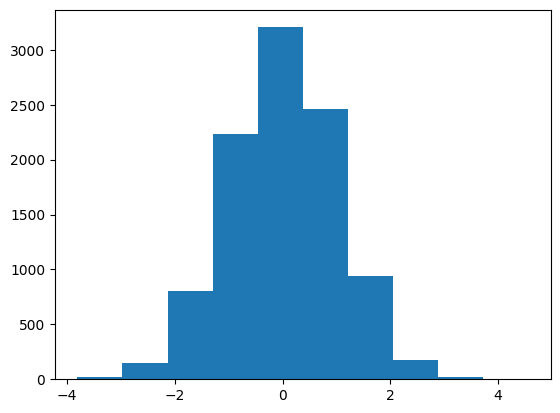

In [11]:
# Standard deviation of the mean 
# If we take an N sized sample, what will it look like?

# this generates a sample of normal data to serve as out population
mu, sigma = 0, 1 # mean and standard deviation
sample = np.random.normal(mu, sigma, 10000)
plt.hist(sample)

In [10]:
# repeatedly sample
sqrt_N = 10
N = sqrt_N*sqrt_N
mean_list = []
stdev_list = []
for i in range(1,100000):
    sample = np.random.normal(mu, sigma, N)
    mean_list.append(sample.mean())
    stdev_list.append(sample.std())


#### sample statistics

* mean of the sample mean
$$
\mu_\mathrm{sm} \approx \mu_\mathrm{pop}
$$
* std of the mean:
$$
\sigma_\mathrm{sm}  \approx { \sigma_\mathrm{pop} \over \sqrt{N} } 
$$

In [6]:
np.mean(mean_list), np.std(mean_list) , 1/np.std(mean_list)

(-1.9528680784133358e-05, 0.09996602726927659, 10.003398427611003)

# Tableau Prep

### AirBnB Buroughs Map

C:\Users\ATM Rahat Hossain\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


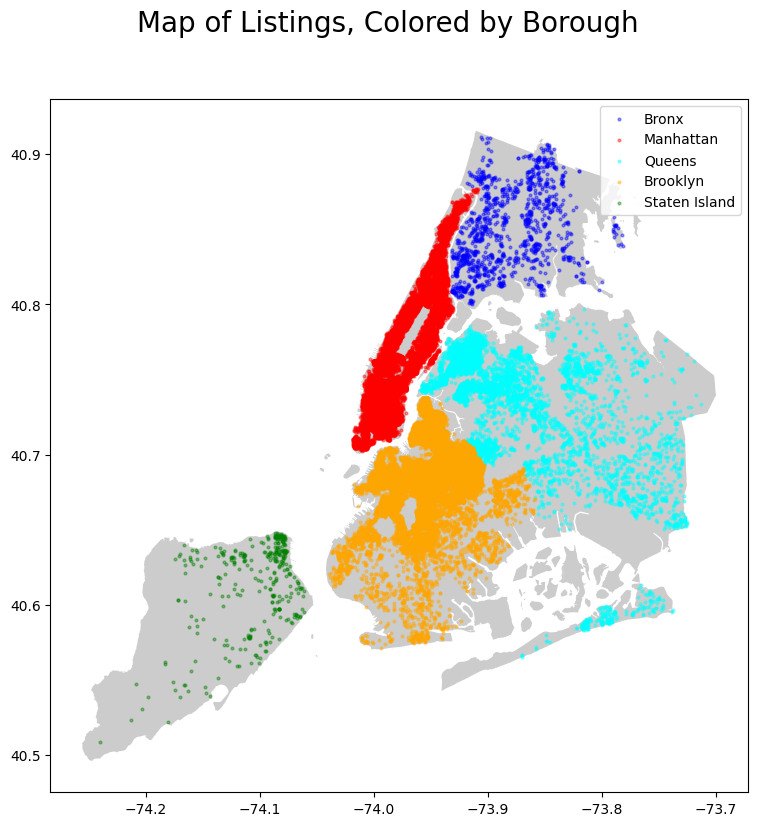

In [7]:
#  We are going to make a map of all of the AirBNB properties. Later we do this in Tableau

cols_to_keep=['longitude','latitude']

crs={'init':'epsg:4326'}

boroughs = geopandas.read_file(geoplot.datasets.get_path('nyc_boroughs'))
geom = geopandas.points_from_xy(df["longitude"], df["latitude"])
geo_df=geopandas.GeoDataFrame(df, crs=crs,geometry=geom)

fig,ax=plt.subplots(figsize=(9,9))
fig.suptitle('Map of Listings, Colored by Borough', fontsize=20)
boroughs.plot(ax=ax,alpha=0.4,color="grey")
geo_df[geo_df['neighbourhood_group']=="Bronx"].plot(ax=ax,markersize=4, alpha=0.4,color="blue", label="Bronx")
geo_df[geo_df['neighbourhood_group']=="Manhattan"].plot(ax=ax,markersize=4, alpha=0.4,color="red", label="Manhattan")
geo_df[geo_df['neighbourhood_group']=="Queens"].plot(ax=ax,markersize=4, alpha=0.4,color="aqua", label="Queens")
geo_df[geo_df['neighbourhood_group']=="Brooklyn"].plot(ax=ax,markersize=4, alpha=0.4,color="orange", label="Brooklyn")
geo_df[geo_df['neighbourhood_group']=="Staten Island"].plot(ax=ax,markersize=4, alpha=0.4,color="green", label="Staten Island")
plt.legend()


### Histograms


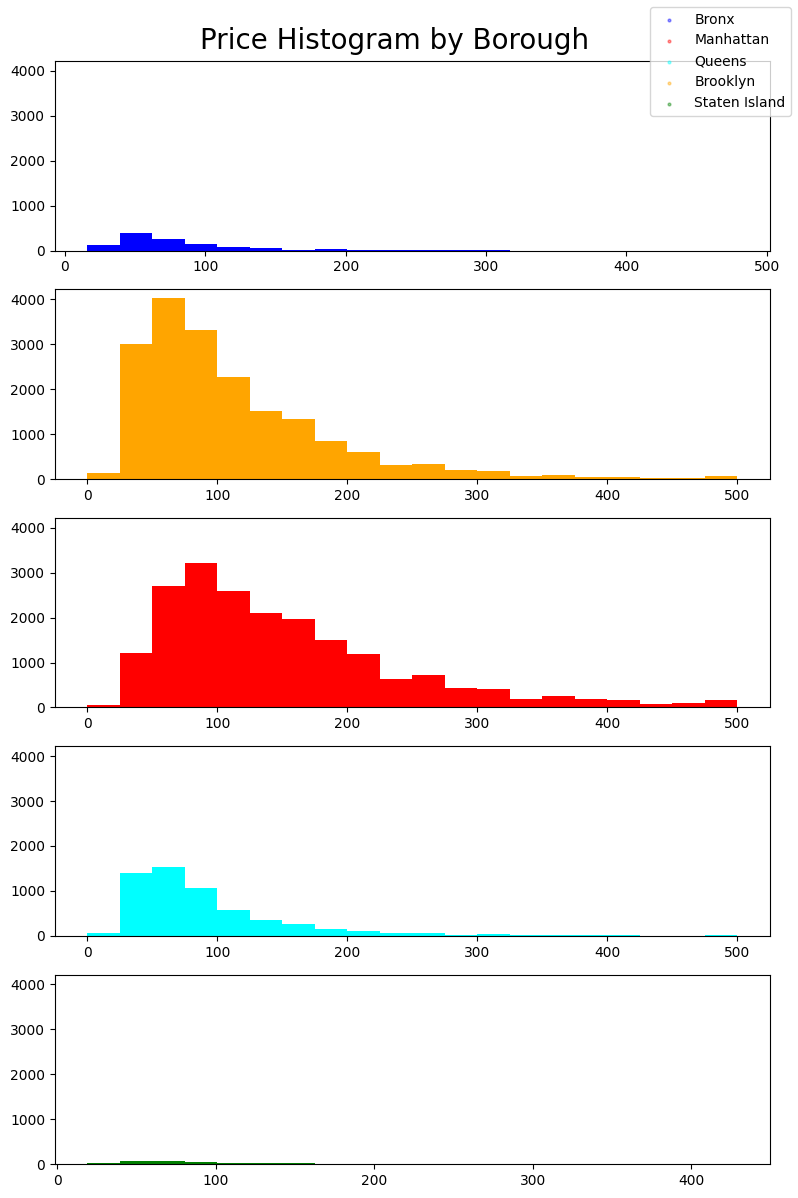

In [8]:
# Now we make a set of price histograms

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

n_bins = 20

# price data to make histograms with

price_filter = df['price']<=500

neighborhood_filter = df['neighbourhood_group']=="Bronx"
bronx = df[neighborhood_filter & price_filter].price

neighborhood_filter = df['neighbourhood_group']=="Brooklyn"
brooklyn = df[neighborhood_filter & price_filter].price

neighborhood_filter = df['neighbourhood_group']=="Manhattan"
manhattan = df[neighborhood_filter & price_filter].price

neighborhood_filter = df['neighbourhood_group']=="Queens"
queens = df[neighborhood_filter & price_filter].price

neighborhood_filter = df['neighbourhood_group']=="Staten Island"
staten = df[neighborhood_filter & price_filter].price

fig, axs = plt.subplots(5, 1, sharey=True, tight_layout=True)

# sefault figsize is  6.4 X 4.8 inches.  we need someting taller
fig.set_size_inches(8, 12.0)

fig.suptitle('Price Histogram by Borough', fontsize=20)
# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(bronx, bins=n_bins, color = 'blue')
axs[1].hist(brooklyn, bins=n_bins, color = 'orange')
axs[2].hist(manhattan, bins=n_bins, color = 'red')
axs[3].hist(queens, bins=n_bins, color = 'aqua')
axs[4].hist(staten, bins=n_bins, color = 'green')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')


### Box and Whisker

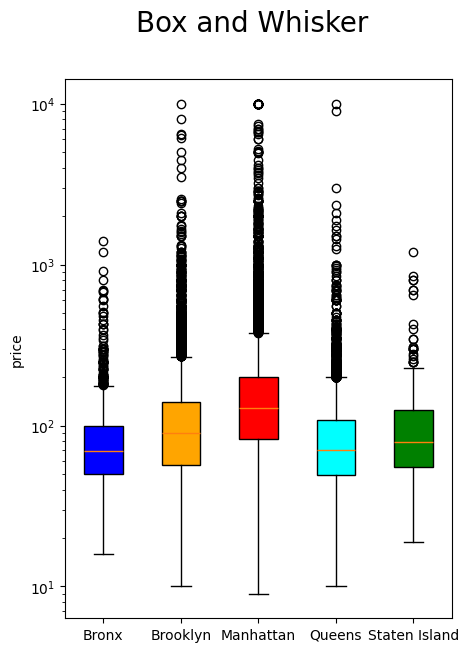

In [9]:
# Finally we make some "Box and Whisker"  Plots, using IQR for the boxes and whiskers

price_filter = (df['price']<=10000) &  (df['price']>=1)

neighborhood_filter = df['neighbourhood_group']=="Bronx"
bronx = df[neighborhood_filter & price_filter].price

neighborhood_filter = df['neighbourhood_group']=="Brooklyn"
brooklyn = df[neighborhood_filter & price_filter].price

neighborhood_filter = df['neighbourhood_group']=="Manhattan"
manhattan = df[neighborhood_filter & price_filter].price

neighborhood_filter = df['neighbourhood_group']=="Queens"
queens = df[neighborhood_filter & price_filter].price

neighborhood_filter = df['neighbourhood_group']=="Staten Island"
staten = df[neighborhood_filter & price_filter].price

box_weights = [bronx,brooklyn, manhattan, queens, staten]
labels = ['Bronx','Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
colors = ['blue', 'orange', 'red', 'aqua', 'green']
fig, ax = plt.subplots()

fig.set_size_inches(5, 7.0)

fig.suptitle('Box and Whisker', fontsize=20)
ax.set_ylabel('price')
ax.set_yscale('log')
bplot = ax.boxplot(box_weights,
                   patch_artist=True)  # will be used to label x-ticks
ax.set_xticklabels(labels) 
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)


In [ ]:
# in tableau, be sure to copy price and disaggregate it to match this plot